# Superstore Project 

## 1- problem Definition and understanding

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to **understand which products, regions, categories and customer segments they should target or avoid**

You can even take this a step further and try and **build a Regression model to predict Sales or Profit.**

Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

## 1-1 Asking questions

- What are the top selling products in the superstore?
- What is the sales trend over time (monthly, yearly)?
- Which category of products generates the highest revenue and profit?
- Which region generates the most sales?


# 2- Data understanding

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

# Import libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
df = pd.read_csv(r"Y:\06 Gdg zag\Sample_Superstore.csv",encoding='windows-1252')

In [5]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None

# Set the maximum number of rows to display
pd.options.display.max_rows = None


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [49]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


### checking data type and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### some statistical information
Understanding the distribution of the data: The mean, min, max, and other metrics provide a quick overview of the distribution of the data.

Outlier detection: The min, 25%, 75%, and max values can help identify outliers in the data.

Data normalization: The mean and std values can be used to normalize the data.

Feature scaling: The min, max, and other values can be used to scale the features to a suitable range.

In [53]:
df.describe(include=[float, int])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [54]:
# what about duplication 
df.duplicated().sum()

0

In [55]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

*let's take a look at categorical features*

In [56]:
df_cat = df[[ 'Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]

In [57]:
df_cat.head()

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


*shown the number of unique values*

In [58]:
# shown the number of unique values in categorical data
for feature in df_cat.columns:
    print(feature,':',df[feature].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


In [59]:
df['Order Date'].nunique()

1237

In [60]:
df['Ship Date'].nunique()

1334

# Exploratory Data Analysis - EDA

In [61]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### What are the top selling products in the superstore?

In [12]:
# Group the data by Product Name and sum up the sales by product
# product_group = df.groupby(["Product Name"]).sum()["Sales"]

product_group = df.drop(columns=["Order Date", "Ship Date"]).groupby("Product Name").sum()["Sales"]


In [13]:
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [14]:
# Sort the data by sales in descending order
top_selling_products = product_group.sort_values(ascending=False)

In [15]:
top_5_selling_products = top_selling_products.head(5)


In [16]:
top_5_selling_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

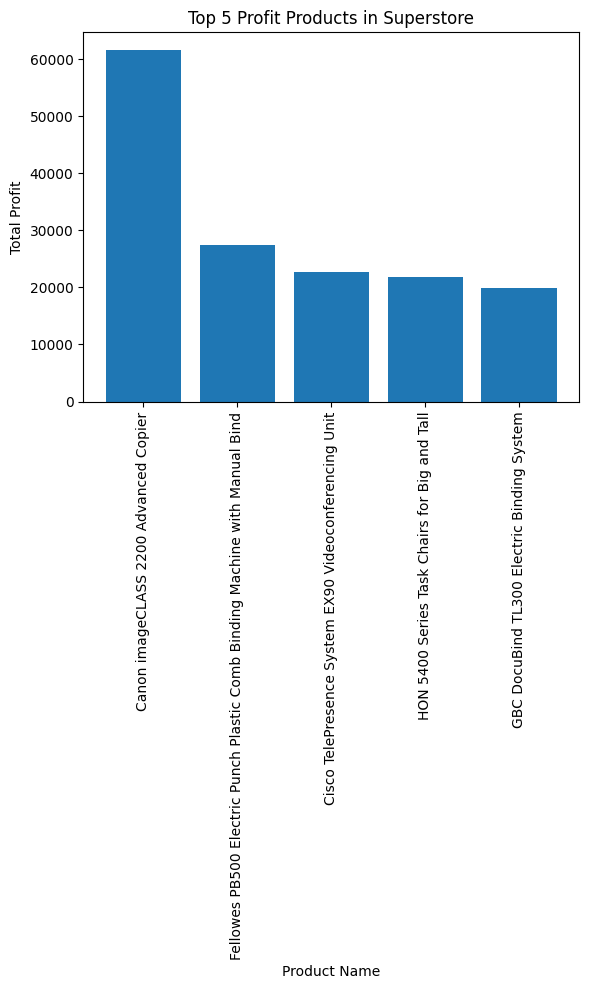

In [20]:
plt.bar(top_5_selling_products.index, top_5_selling_products.values)

# Add a title to the plot
plt.title("Top 5 Profit Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.xticks(rotation=90)
# Show the plot
plt.show()

### top-profitable products ?

In [21]:
product_group = df.drop(columns=["Order Date", "Ship Date"]).groupby(["Product Name"]).sum()["Profit"]

top_profit_products = product_group.sort_values(ascending=False)

top_5_profit_products = top_profit_products.head(5)  


In [22]:
top_5_profit_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

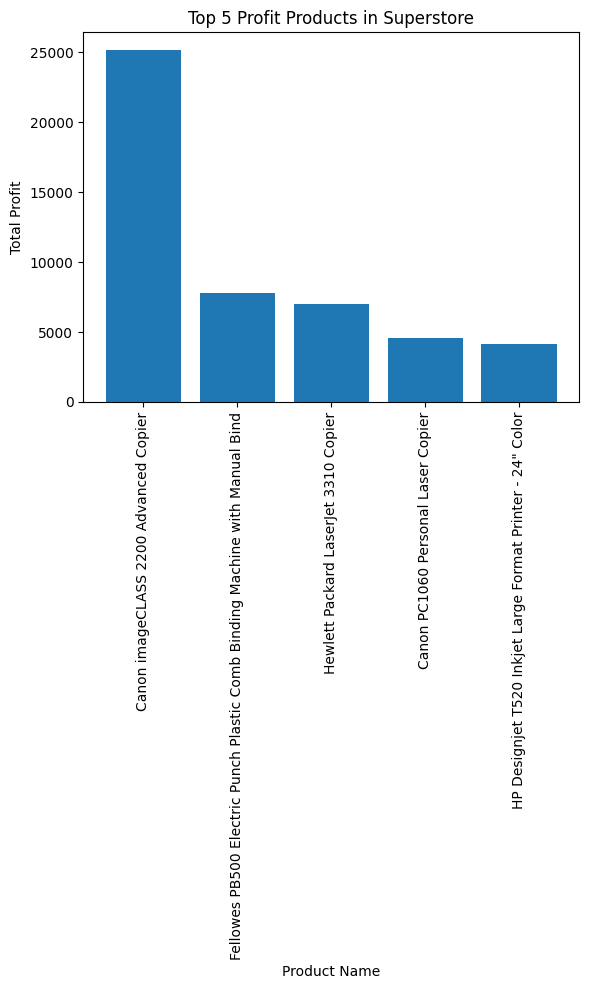

In [23]:
plt.bar(top_5_profit_products.index, top_5_profit_products.values)
plt.title("Top 5 Profit Products in Superstore")

plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.xticks(rotation=90)
plt.show()

### Are the top-selling products the most profitable?

In [24]:
top_5_profit_products.index

Index(['Canon imageCLASS 2200 Advanced Copier',
       'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
       'Hewlett Packard LaserJet 3310 Copier',
       'Canon PC1060 Personal Laser Copier',
       'HP Designjet T520 Inkjet Large Format Printer - 24" Color'],
      dtype='object', name='Product Name')

In [72]:
top_5_profit_products.index == top_5_selling_products.index

array([ True,  True, False, False, False])

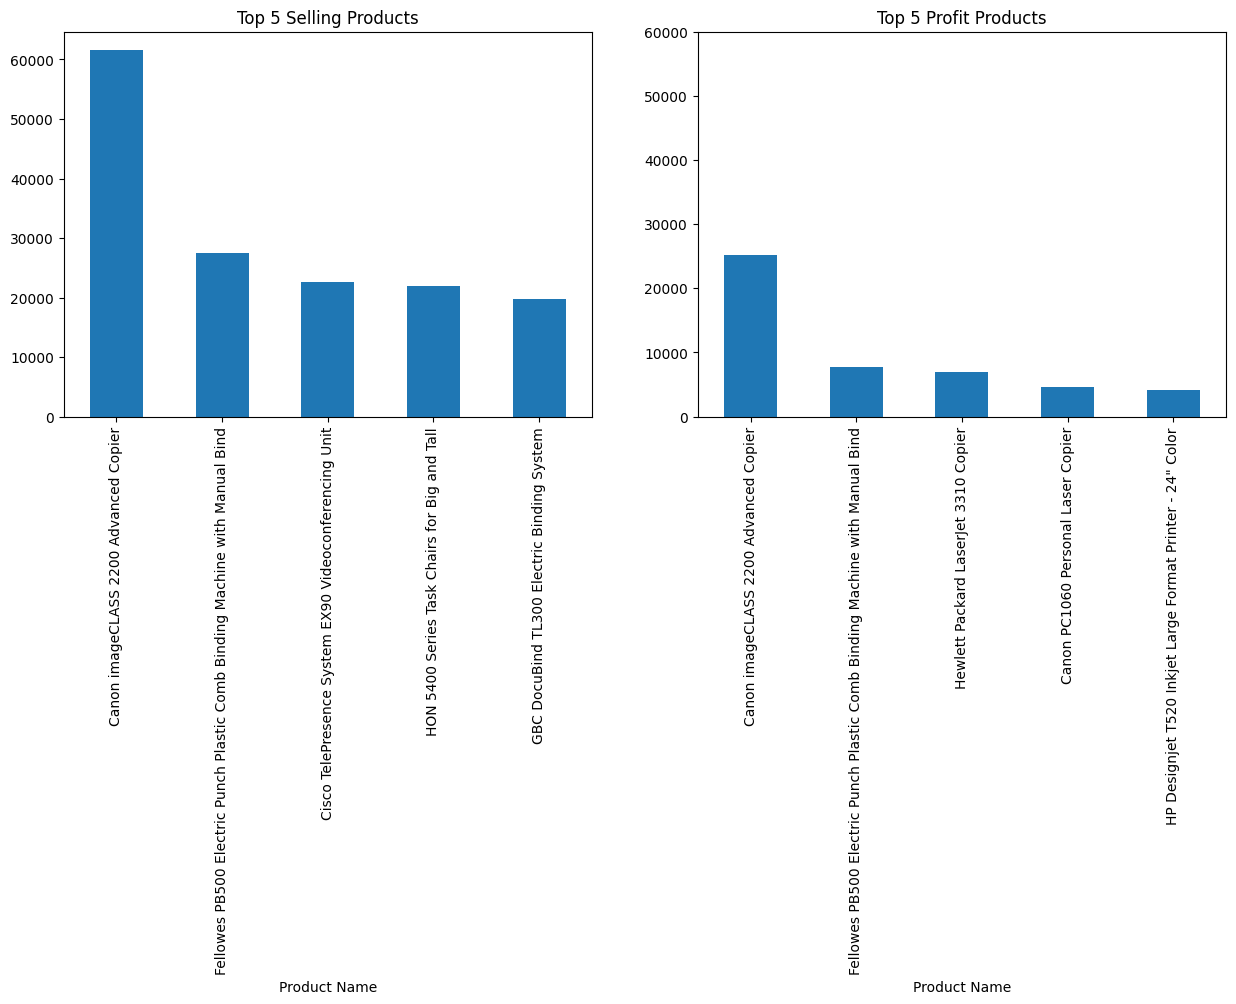

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot the top 5 selling products in the first column
top_5_selling_products.plot(kind="bar", y="Sales", ax=ax1)

# Set the title for the first plot
ax1.set_title("Top 5 Selling Products")

# Plot the top 5 profit products in the second column
top_5_profit_products.plot(kind="bar", y="Profit", ax=ax2)

# Set the title for the second plot
ax2.set_title("Top 5 Profit Products")
ax2.set_ylim(0,60000)

# Show the plot
plt.show()


In [74]:
list(top_5_profit_products.index)

['Canon imageCLASS 2200 Advanced Copier',
 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
 'Hewlett Packard LaserJet 3310 Copier',
 'Canon PC1060 Personal Laser Copier',
 'HP Designjet T520 Inkjet Large Format Printer - 24" Color']

## Now we can conclude some things
**top_5_selling_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Cisco TelePresence System EX90 Videoconferencing Unit
- HON 5400 Series Task Chairs for Big and Tall
- GBC DocuBind TL300 Electric Binding System

**top_5_profit_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Hewlett Packard LaserJet 3310 Copier
- Canon PC1060 Personal Laser Copier
- HP Designjet T520 Inkjet Large Format Printer - 24" Color

**The highest selling products, and the most profitable**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind


In [26]:
df.Region.value_counts()


Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

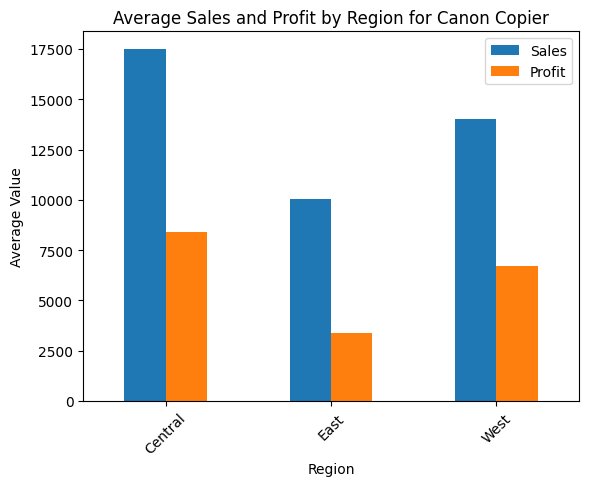

In [27]:
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

region_group = product.groupby("Region")[["Sales", "Profit"]].mean()

region_group.plot(kind="bar")
plt.title("Average Sales and Profit by Region for Canon Copier")
plt.xlabel("Region")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

In [28]:
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
6425,6426,CA-2016-143714,2016-05-23,2016-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


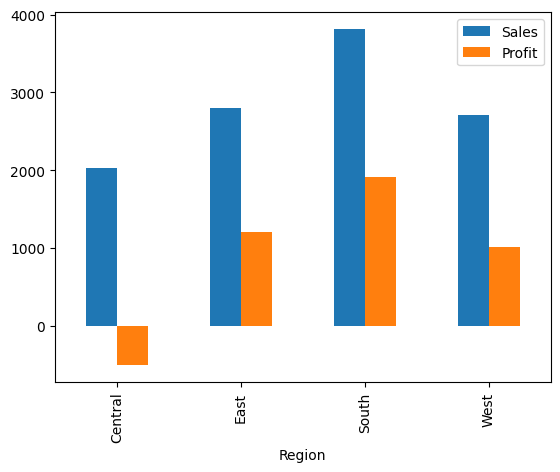

In [77]:
product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Group the data by Region 
region_group = product.groupby("Region")[["Sales", "Profit"]].mean()

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# Show the plot
plt.show()

In [29]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,2017-09-10,2017-09-15,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


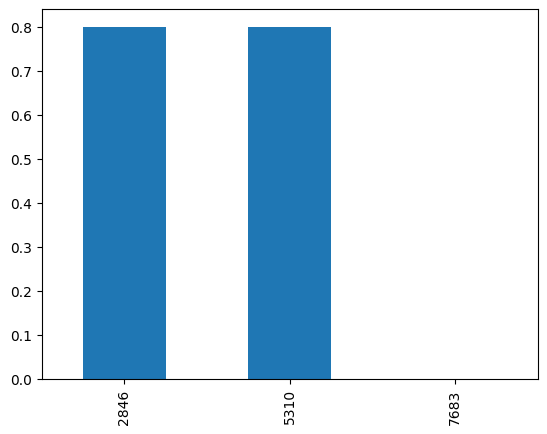

In [30]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]

# Plot a histogram of the discounts offered for the product in the central region
product["Discount"].plot(kind="bar")

# Show the plot
plt.show()


The company loses when it sells its **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind** products in the Central! as it make 80% discount on 2 products from 3 products

# What is the sales trend over time (monthly, yearly)?

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [41]:
monthly_sales

,Profit
Order Date,
2014-01-31,2450.1907
2014-02-28,862.3084
2014-03-31,498.7299
2014-04-30,3488.8352
2014-05-31,2738.7096
2014-06-30,4976.5244
2014-07-31,-841.4826
2014-08-31,5318.1050
2014-09-30,8328.0994


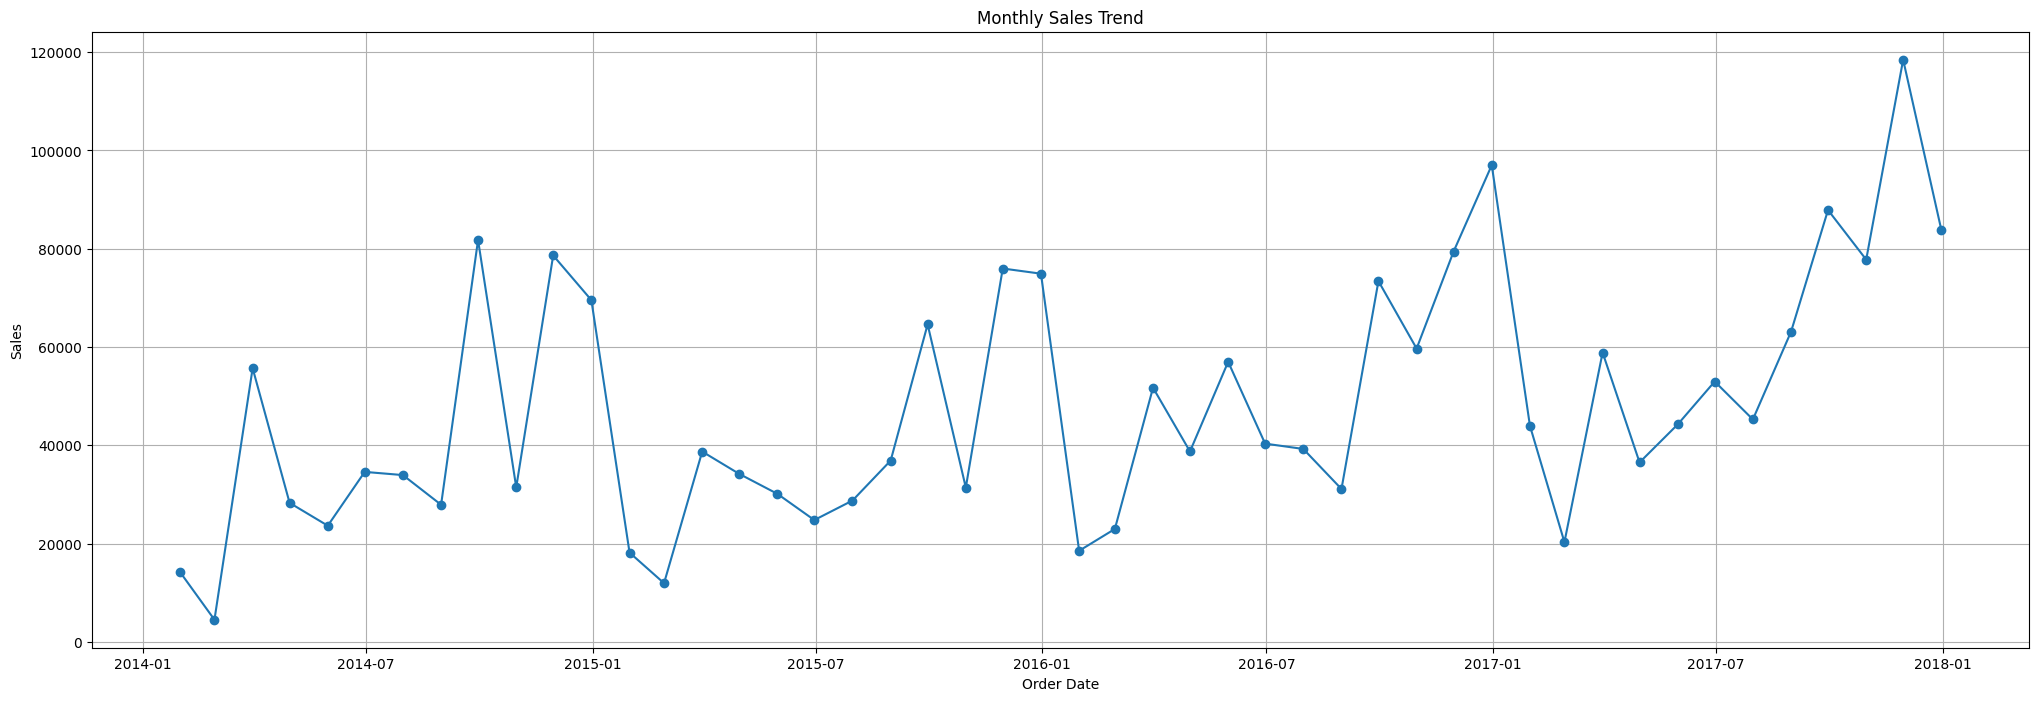

In [42]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))[['Sales']].sum()

plt.figure(figsize=(25, 8))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', linestyle='-')  # استخدام الفهرس كتواريخ
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)  
plt.show()

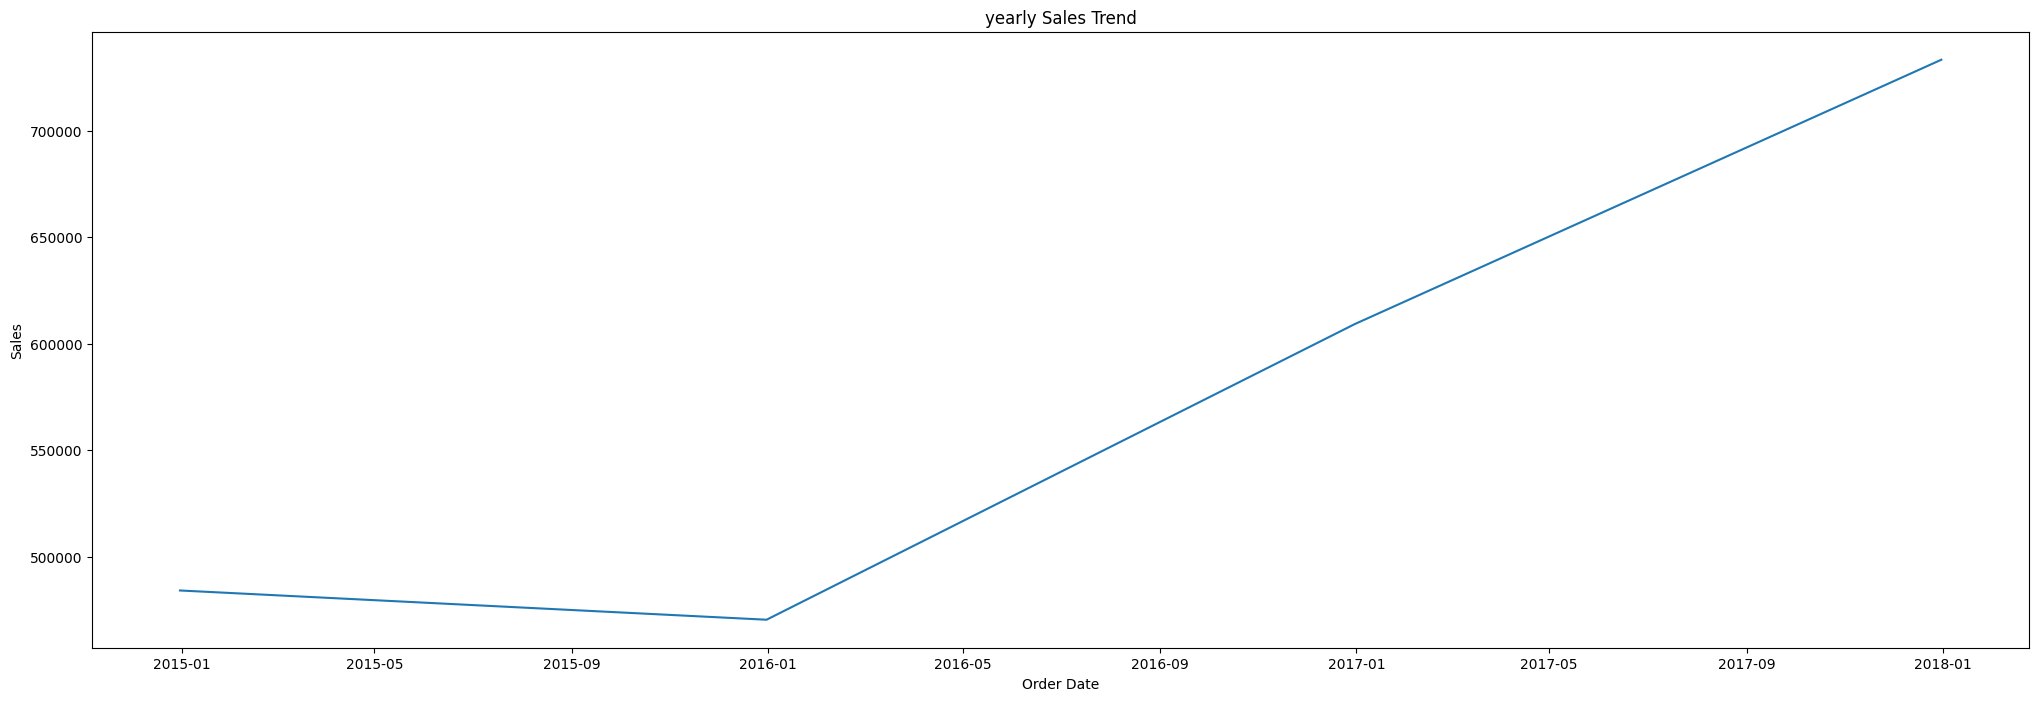

In [43]:
yearly_sales = monthly_sales.resample('Y').sum() 


plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()


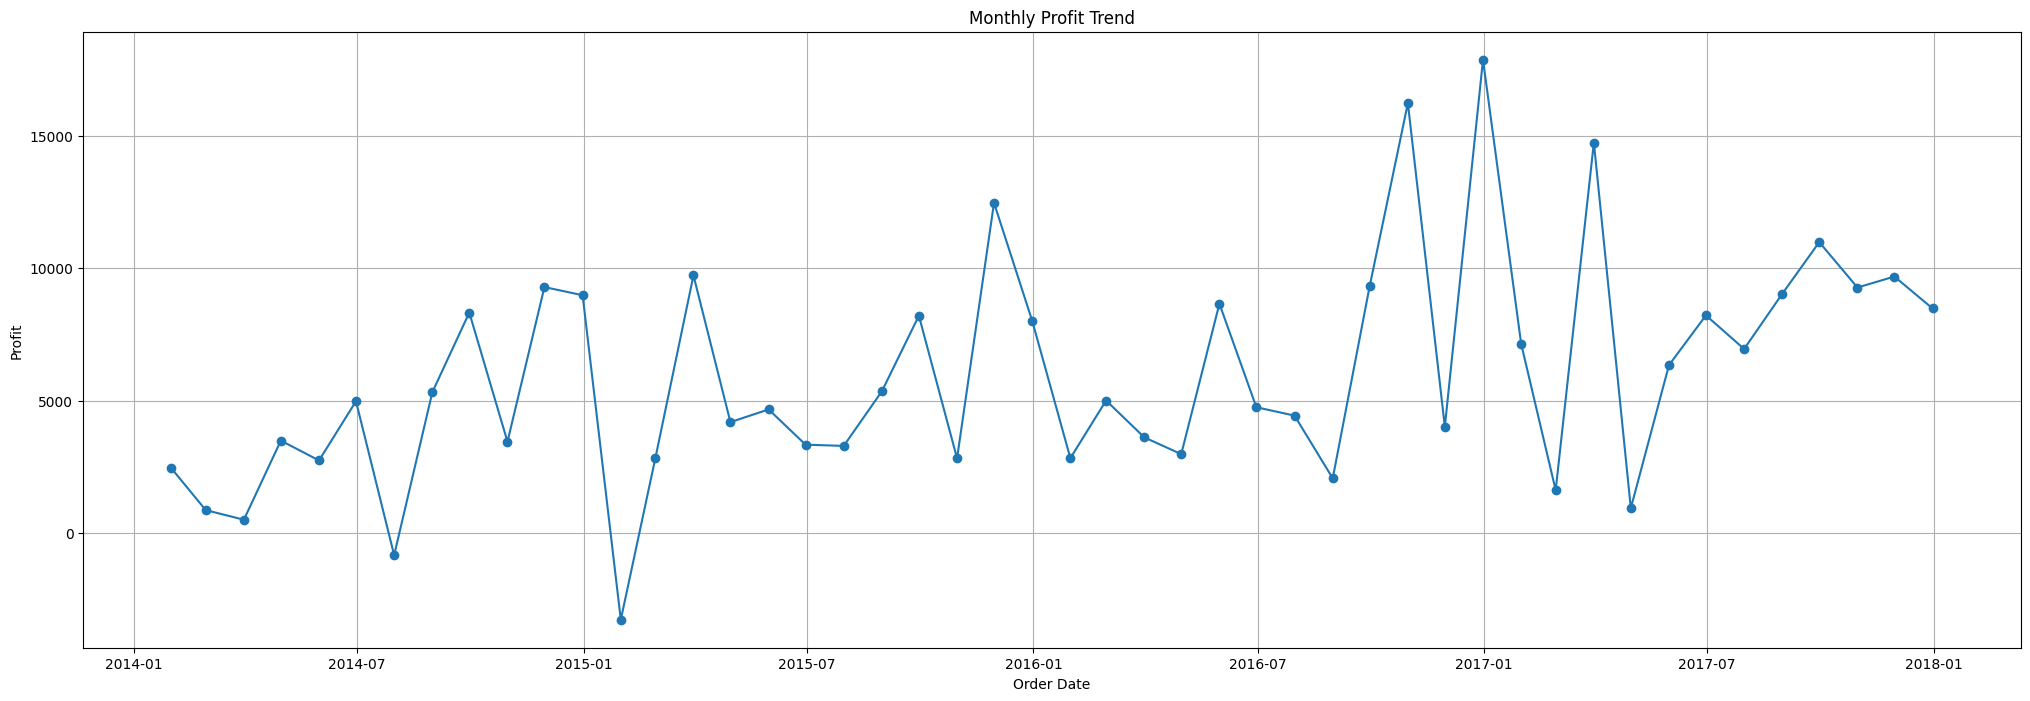

In [44]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))[['Profit']].sum()

plt.figure(figsize=(25, 8))
plt.plot(monthly_sales.index, monthly_sales['Profit'], marker='o', linestyle='-')  
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("Monthly Profit Trend")
plt.grid(True) 
plt.show()

**The general trend of the company is profit, but there are some periods in which profits decrease and then rise again. I think it's because of the discounts**

## Which region & place generates the most sales?

In [53]:
df_places = df[['Country','City','State','Region']]

In [54]:
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [55]:
for place in df_places.columns:
    print(place,':',df_places[place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [56]:
df_places = df[['City','State','Region','Sales','Profit']]

In [57]:
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


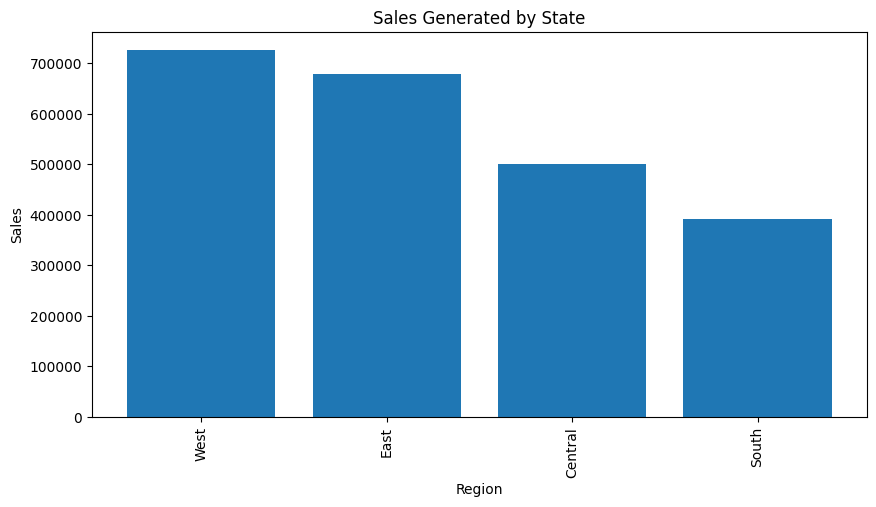

In [58]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales geProfitnerated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()


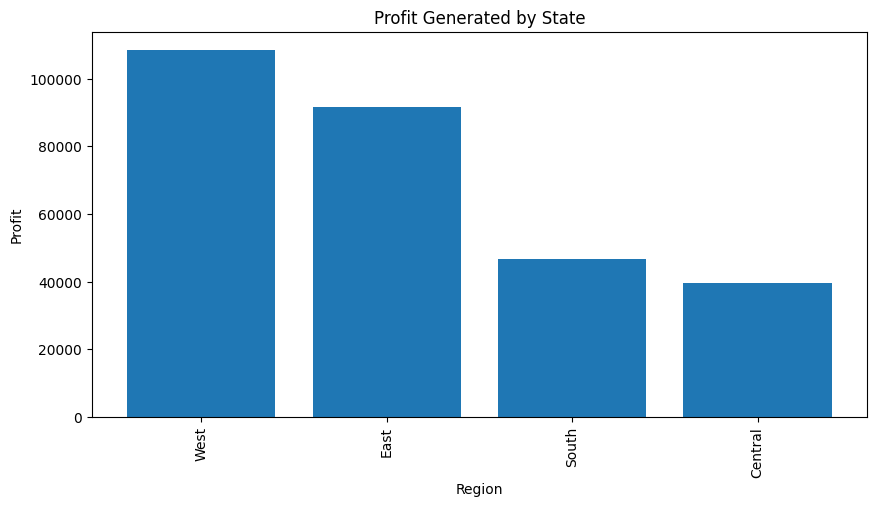

In [59]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()


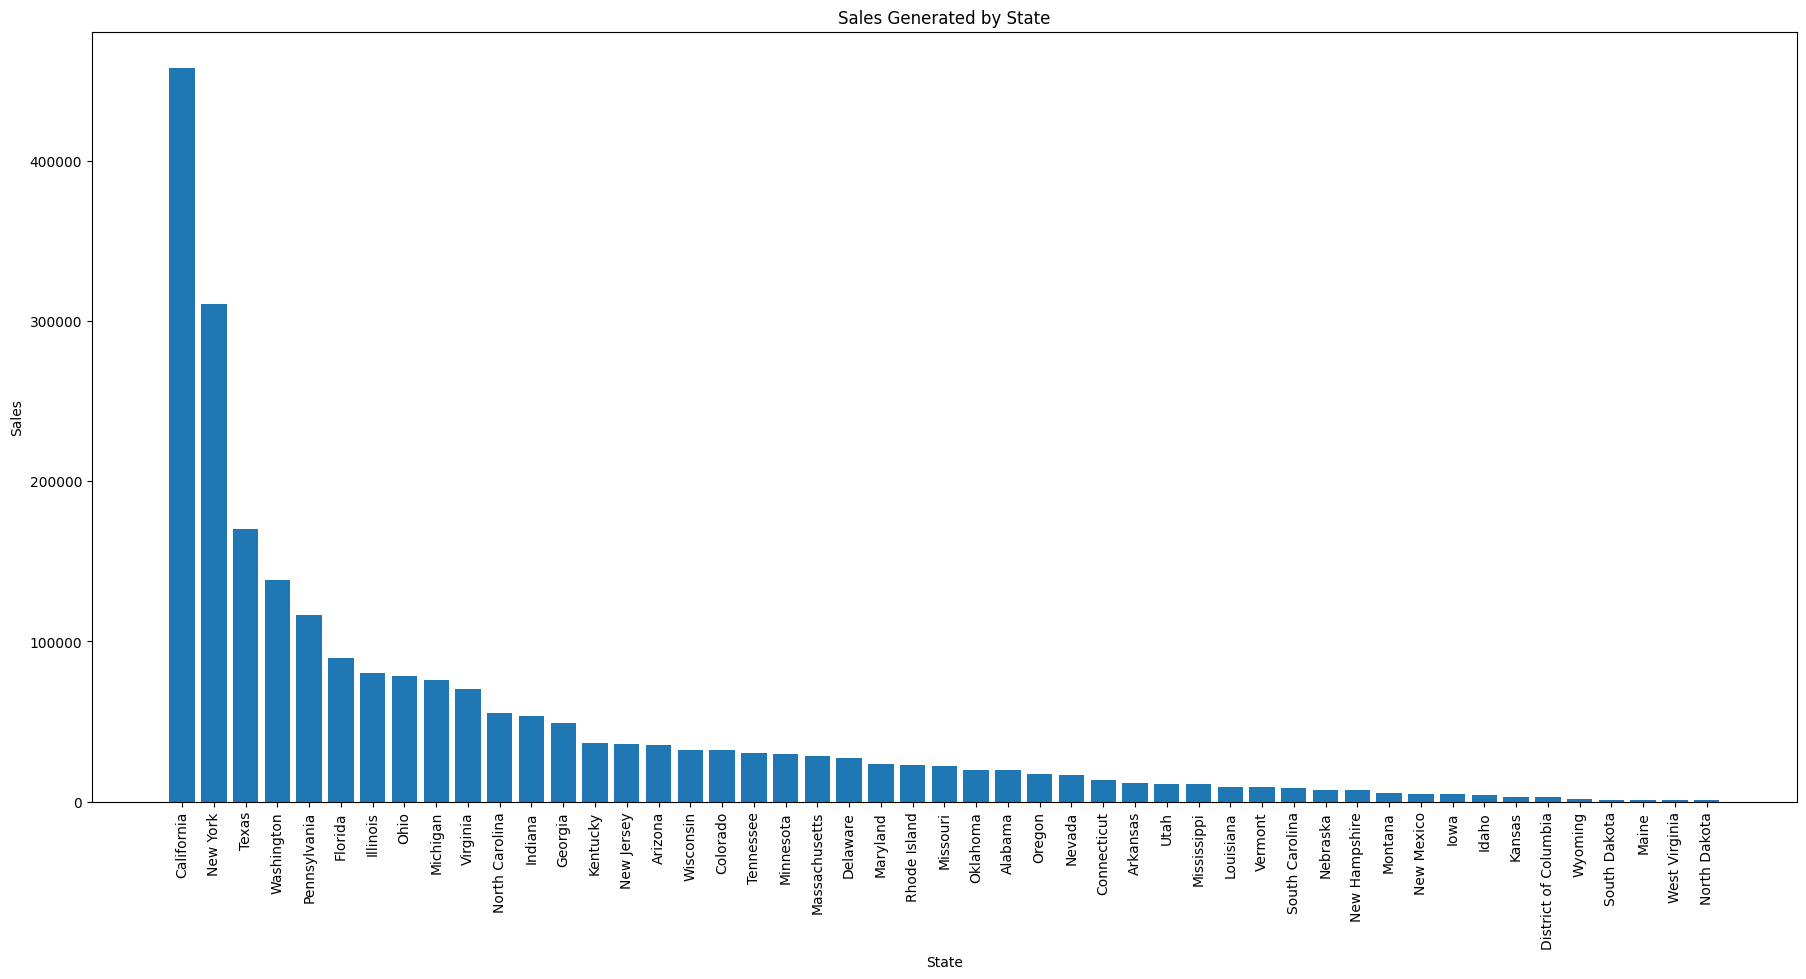

In [60]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()


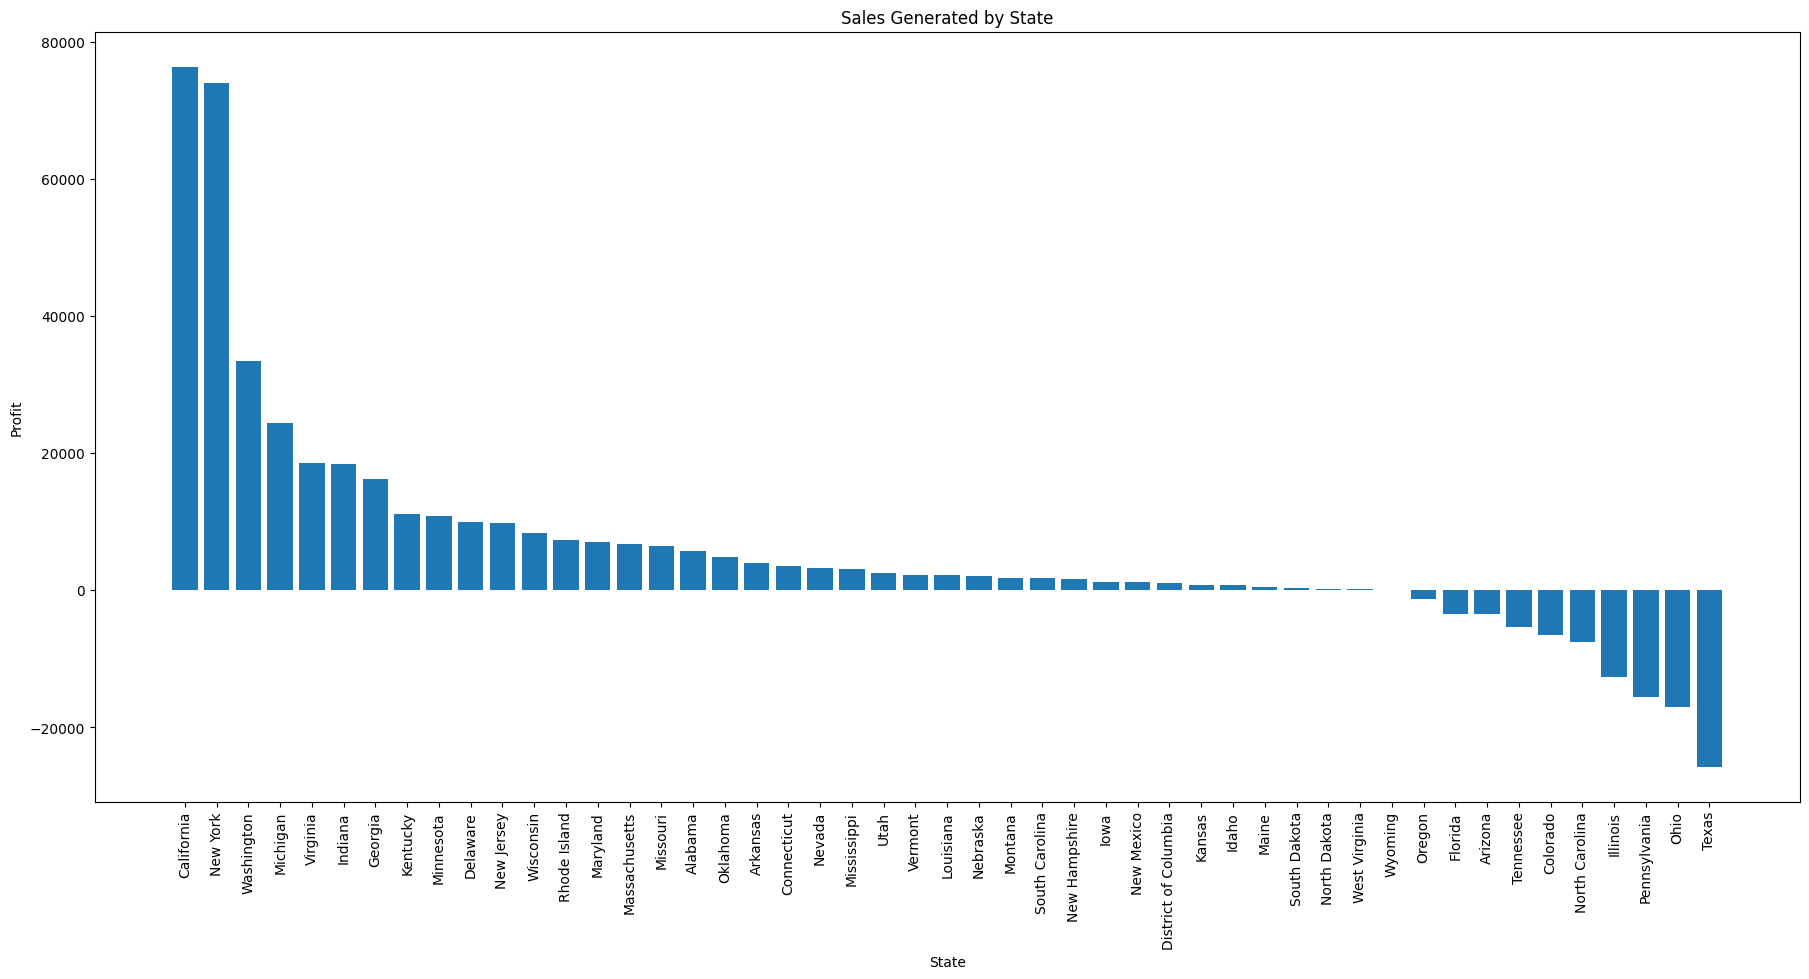

In [61]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Profit'], align='center',)
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()


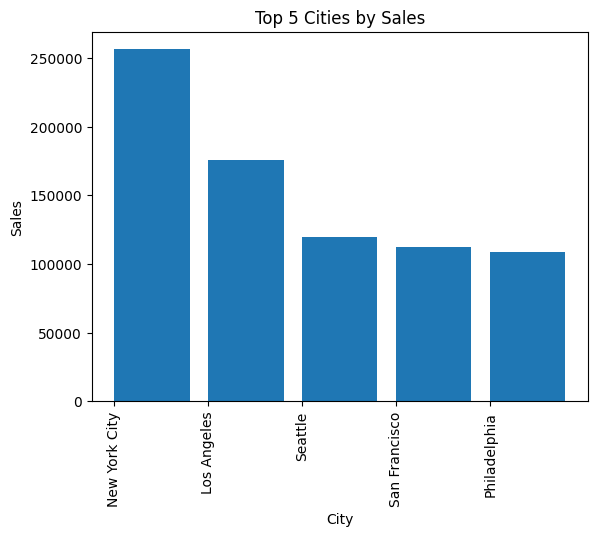

In [71]:
grouped_data = df_places.groupby('City', as_index=F).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Sales'], align='center')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=90)

plt.show()


In [67]:
grouped_data

,City,State,Region,Sales,Profit
329,New York City,New YorkNew YorkNew YorkNew YorkNew YorkNew Yo...,EastEastEastEastEastEastEastEastEastEastEastEa...,256368.1610,62036.9837
266,Los Angeles,CaliforniaCaliforniaCaliforniaCaliforniaCalifo...,WestWestWestWestWestWestWestWestWestWestWestWe...,175851.3410,30440.7579
452,Seattle,WashingtonWashingtonWashingtonWashingtonWashin...,WestWestWestWestWestWestWestWestWestWestWestWe...,119540.7420,29156.0967
438,San Francisco,CaliforniaCaliforniaCaliforniaCaliforniaCalifo...,WestWestWestWestWestWestWestWestWestWestWestWe...,112669.0920,17507.3854
374,Philadelphia,PennsylvaniaPennsylvaniaPennsylvaniaPennsylvan...,EastEastEastEastEastEastEastEastEastEastEastEa...,109077.0130,-13837.7674
207,Houston,TexasTexasTexasTexasTexasTexasTexasTexasTexasT...,CentralCentralCentralCentralCentralCentralCent...,64504.7604,-10153.5485
80,Chicago,IllinoisIllinoisIllinoisIllinoisIllinoisIllino...,CentralCentralCentralCentralCentralCentralCent...,48539.5410,-6654.5688
437,San Diego,CaliforniaCaliforniaCaliforniaCaliforniaCalifo...,WestWestWestWestWestWestWestWestWestWestWestWe...,47521.0290,6377.1960
216,Jacksonville,FloridaFloridaFloridaFloridaFloridaFloridaFlor...,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,44713.1830,-2323.8350
464,Springfield,VirginiaOhioVirginiaVirginiaVirginiaOhioVirgin...,SouthEastSouthSouthSouthEastSouthSouthEastEast...,43054.3420,6200.6974


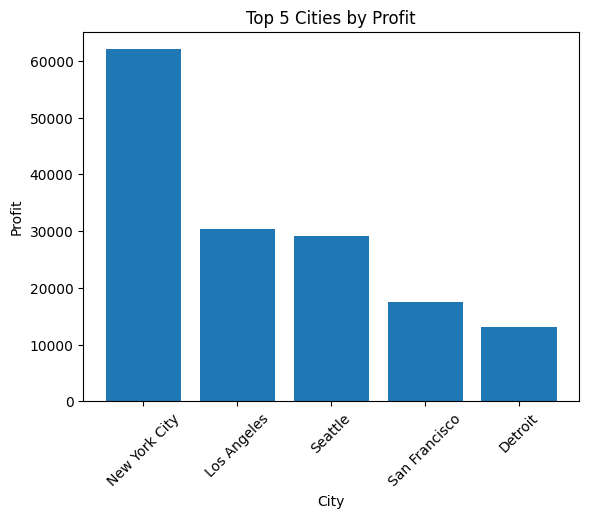

In [72]:
grouped_data = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Profit'], align='center')
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Top 5 Cities by Profit")
plt.xticks(rotation=90)

plt.show()


In [102]:
top_5_cities.City

329    New York City
266      Los Angeles
452          Seattle
438    San Francisco
123          Detroit
Name: City, dtype: object

## top placies are :
**Cities**: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

**State** : [california, New York]

**Region** : [West]

### Completed the Exploratory Data Analysis (EDA) phase
